In [643]:
import pandas as pd
import os
import glob
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [644]:
#combining no of csv file into one file with name combine_csv
os.chdir('D:\TESTTT')
extension='csv'

all_filenames=[i for i in glob.glob('*.{}'.format(extension))]

combined_csv=pd.concat([pd.read_csv(f) for f in all_filenames])
df=combined_csv
df

,AP1RTT,AP1STDEV,AP1RSS,AP2RTT,AP2STDEV,AP2RSS,AP3RTT,AP3STDEV,AP3RSS,x,y
0,7.789,0.371,-61.0,1.311,0.082,-47,11.037,1.192,-74,1,1
1,7.731,0.277,-61.0,0.999,0.186,-47,10.452,0.256,-72,1,1
2,7.731,0.442,-61.0,1.155,0.171,-47,9.368,0.661,-69,1,1
3,7.672,0.698,-62.0,1.194,0.206,-47,9.709,1.533,-67,1,1
4,7.643,2.609,-63.0,1.038,0.151,-46,9.748,2.350,-70,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1115,7.232,0.465,-60.0,12.825,0.293,-72,0.491,0.989,-51,6,8
1116,6.969,1.224,-62.0,13.528,0.637,-71,0.569,0.938,-51,6,8
1117,6.764,2.843,-64.0,11.389,1.182,-69,0.608,0.874,-51,6,8
1118,6.241,0.865,-54.0,10.178,0.968,-67,0.373,1.017,-51,6,8


In [645]:
df.drop(['AP1RSS','AP2RSS','AP3RSS'],axis=1,inplace=True)

In [646]:
df

,AP1RTT,AP1STDEV,AP2RTT,AP2STDEV,AP3RTT,AP3STDEV,x,y
0,7.789,0.371,1.311,0.082,11.037,1.192,1,1
1,7.731,0.277,0.999,0.186,10.452,0.256,1,1
2,7.731,0.442,1.155,0.171,9.368,0.661,1,1
3,7.672,0.698,1.194,0.206,9.709,1.533,1,1
4,7.643,2.609,1.038,0.151,9.748,2.350,1,1
...,...,...,...,...,...,...,...,...
1115,7.232,0.465,12.825,0.293,0.491,0.989,6,8
1116,6.969,1.224,13.528,0.637,0.569,0.938,6,8
1117,6.764,2.843,11.389,1.182,0.608,0.874,6,8
1118,6.241,0.865,10.178,0.968,0.373,1.017,6,8


In [647]:
dff=df.assign(Product_RTT=df['AP1RTT']*df['AP2RTT']*df['AP3RTT'],Product_RTT12=df['AP1RTT']*df['AP2RTT'],Product_RTT23=df['AP2RTT']*df['AP3RTT'],Product_RTT13=df['AP1RTT']*df['AP3RTT'],square_RTT1=df['AP1RTT']*df['AP1RTT'],square_RTT2=df['AP2RTT']*df['AP2RTT'],square_RTT3=df['AP3RTT']*df['AP3RTT'])
dff

,AP1RTT,AP1STDEV,AP2RTT,AP2STDEV,AP3RTT,AP3STDEV,x,y,Product_RTT,Product_RTT12,Product_RTT23,Product_RTT13,square_RTT1,square_RTT2,square_RTT3
0,7.789,0.371,1.311,0.082,11.037,1.192,1,1,112.702990,10.211379,14.469507,85.967193,60.668521,1.718721,121.815369
1,7.731,0.277,0.999,0.186,10.452,0.256,1,1,80.723608,7.723269,10.441548,80.804412,59.768361,0.998001,109.244304
2,7.731,0.442,1.155,0.171,9.368,0.661,1,1,83.649729,8.929305,10.820040,72.424008,59.768361,1.334025,87.759424
3,7.672,0.698,1.194,0.206,9.709,1.533,1,1,88.938013,9.160368,11.592546,74.487448,58.859584,1.425636,94.264681
4,7.643,2.609,1.038,0.151,9.748,2.350,1,1,77.335115,7.933434,10.118424,74.503964,58.415449,1.077444,95.023504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,7.232,0.465,12.825,0.293,0.491,0.989,6,8,45.540446,92.750400,6.297075,3.550912,52.301824,164.480625,0.241081
1116,6.969,1.224,13.528,0.637,0.569,0.938,6,8,53.643404,94.276632,7.697432,3.965361,48.566961,183.006784,0.323761
1117,6.764,2.843,11.389,1.182,0.608,0.874,6,8,46.837399,77.035196,6.924512,4.112512,45.751696,129.709321,0.369664
1118,6.241,0.865,10.178,0.968,0.373,1.017,6,8,23.693295,63.520898,3.796394,2.327893,38.950081,103.591684,0.139129


In [648]:
import pandas as pd

# Group the DataFrame by 'x' and 'y'
groups = dff.groupby(['x', 'y'])

# Split the groups into two separate dataframes
df1 = pd.concat([group.iloc[:len(group) // 2] for _, group in groups])
df2 = pd.concat([group.iloc[len(group) // 2:] for _, group in groups])


In [649]:
df1

,AP1RTT,AP1STDEV,AP2RTT,AP2STDEV,AP3RTT,AP3STDEV,x,y,Product_RTT,Product_RTT12,Product_RTT23,Product_RTT13,square_RTT1,square_RTT2,square_RTT3
0,7.789,0.371,1.311,0.082,11.037,1.192,1,1,112.702990,10.211379,14.469507,85.967193,60.668521,1.718721,121.815369
1,7.731,0.277,0.999,0.186,10.452,0.256,1,1,80.723608,7.723269,10.441548,80.804412,59.768361,0.998001,109.244304
2,7.731,0.442,1.155,0.171,9.368,0.661,1,1,83.649729,8.929305,10.820040,72.424008,59.768361,1.334025,87.759424
3,7.672,0.698,1.194,0.206,9.709,1.533,1,1,88.938013,9.160368,11.592546,74.487448,58.859584,1.425636,94.264681
4,7.643,2.609,1.038,0.151,9.748,2.350,1,1,77.335115,7.933434,10.118424,74.503964,58.415449,1.077444,95.023504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,7.438,0.450,10.881,0.453,0.491,1.005,6,8,39.738043,80.932878,5.342571,3.652058,55.323844,118.396161,0.241081
556,6.553,1.088,10.803,0.497,0.491,0.934,6,8,34.758901,70.792059,5.304273,3.217523,42.941809,116.704809,0.241081
557,7.320,1.326,10.608,0.544,0.491,0.918,6,8,38.126425,77.650560,5.208528,3.594120,53.582400,112.529664,0.241081
558,7.398,0.521,10.686,0.496,0.491,0.989,6,8,38.816019,79.055028,5.246826,3.632418,54.730404,114.190596,0.241081


In [650]:
new_name={'AP1RTT':'AP1RTTA','AP1STDEV':'AP1STDEVA','AP2RTT':'AP2RTTA','AP2STDEV':'AP2STDEVA','AP3RTT':'AP3RTTA','AP3STDEV':'AP3STDEVA','Product_RTT':'Product_RTTA','Product_RTT12':'Product_RTT12A','Product_RTT13':'Product_RTT13A','square_RTT1':'square_RTT1A','square_RTT2':'square_RTT2A','square_RTT3':'square_RTT3A'}
df1.rename(columns=new_name,inplace=True)
df1

,AP1RTTA,AP1STDEVA,AP2RTTA,AP2STDEVA,AP3RTTA,AP3STDEVA,x,y,Product_RTTA,Product_RTT12A,Product_RTT23,Product_RTT13A,square_RTT1A,square_RTT2A,square_RTT3A
0,7.789,0.371,1.311,0.082,11.037,1.192,1,1,112.702990,10.211379,14.469507,85.967193,60.668521,1.718721,121.815369
1,7.731,0.277,0.999,0.186,10.452,0.256,1,1,80.723608,7.723269,10.441548,80.804412,59.768361,0.998001,109.244304
2,7.731,0.442,1.155,0.171,9.368,0.661,1,1,83.649729,8.929305,10.820040,72.424008,59.768361,1.334025,87.759424
3,7.672,0.698,1.194,0.206,9.709,1.533,1,1,88.938013,9.160368,11.592546,74.487448,58.859584,1.425636,94.264681
4,7.643,2.609,1.038,0.151,9.748,2.350,1,1,77.335115,7.933434,10.118424,74.503964,58.415449,1.077444,95.023504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,7.438,0.450,10.881,0.453,0.491,1.005,6,8,39.738043,80.932878,5.342571,3.652058,55.323844,118.396161,0.241081
556,6.553,1.088,10.803,0.497,0.491,0.934,6,8,34.758901,70.792059,5.304273,3.217523,42.941809,116.704809,0.241081
557,7.320,1.326,10.608,0.544,0.491,0.918,6,8,38.126425,77.650560,5.208528,3.594120,53.582400,112.529664,0.241081
558,7.398,0.521,10.686,0.496,0.491,0.989,6,8,38.816019,79.055028,5.246826,3.632418,54.730404,114.190596,0.241081


In [651]:
df2

,AP1RTT,AP1STDEV,AP2RTT,AP2STDEV,AP3RTT,AP3STDEV,x,y,Product_RTT,Product_RTT12,Product_RTT23,Product_RTT13,square_RTT1,square_RTT2,square_RTT3
549,7.643,1.574,1.077,0.150,10.413,2.023,1,1,85.714724,8.231511,11.214801,79.586559,58.415449,1.159929,108.430569
550,7.731,0.892,1.106,0.136,10.256,2.027,1,1,87.693784,8.550486,11.343136,79.289136,59.768361,1.223236,105.185536
551,7.760,0.935,1.018,0.175,10.295,2.079,1,1,81.327206,7.899680,10.480310,79.889200,60.217600,1.036324,105.987025
552,7.760,0.958,1.047,0.181,10.452,2.004,1,1,84.919573,8.124720,10.943244,81.107520,60.217600,1.096209,109.244304
553,8.298,0.851,1.038,0.162,10.374,2.026,1,1,89.354623,8.613324,10.768212,86.083452,68.856804,1.077444,107.619876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,7.232,0.465,12.825,0.293,0.491,0.989,6,8,45.540446,92.750400,6.297075,3.550912,52.301824,164.480625,0.241081
1116,6.969,1.224,13.528,0.637,0.569,0.938,6,8,53.643404,94.276632,7.697432,3.965361,48.566961,183.006784,0.323761
1117,6.764,2.843,11.389,1.182,0.608,0.874,6,8,46.837399,77.035196,6.924512,4.112512,45.751696,129.709321,0.369664
1118,6.241,0.865,10.178,0.968,0.373,1.017,6,8,23.693295,63.520898,3.796394,2.327893,38.950081,103.591684,0.139129


In [652]:
new_name={'AP1RTT':'AP1RTTB','AP1STDEV':'AP1STDEVB','AP2RTT':'AP2RTTB','AP2STDEV':'AP2STDEVB','AP3RTT':'AP3RTTB','AP3STDEV':'AP3STDEVB','Product_RTT':'Product_RTTB','Product_RTT12':'Product_RTT12B','Product_RTT13':'Product_RTT13B','square_RTT1':'square_RTT1B','square_RTT2':'square_RTT2B','square_RTT3':'square_RTT3B'}
df2.rename(columns=new_name,inplace=True)
df2

,AP1RTTB,AP1STDEVB,AP2RTTB,AP2STDEVB,AP3RTTB,AP3STDEVB,x,y,Product_RTTB,Product_RTT12B,Product_RTT23,Product_RTT13B,square_RTT1B,square_RTT2B,square_RTT3B
549,7.643,1.574,1.077,0.150,10.413,2.023,1,1,85.714724,8.231511,11.214801,79.586559,58.415449,1.159929,108.430569
550,7.731,0.892,1.106,0.136,10.256,2.027,1,1,87.693784,8.550486,11.343136,79.289136,59.768361,1.223236,105.185536
551,7.760,0.935,1.018,0.175,10.295,2.079,1,1,81.327206,7.899680,10.480310,79.889200,60.217600,1.036324,105.987025
552,7.760,0.958,1.047,0.181,10.452,2.004,1,1,84.919573,8.124720,10.943244,81.107520,60.217600,1.096209,109.244304
553,8.298,0.851,1.038,0.162,10.374,2.026,1,1,89.354623,8.613324,10.768212,86.083452,68.856804,1.077444,107.619876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,7.232,0.465,12.825,0.293,0.491,0.989,6,8,45.540446,92.750400,6.297075,3.550912,52.301824,164.480625,0.241081
1116,6.969,1.224,13.528,0.637,0.569,0.938,6,8,53.643404,94.276632,7.697432,3.965361,48.566961,183.006784,0.323761
1117,6.764,2.843,11.389,1.182,0.608,0.874,6,8,46.837399,77.035196,6.924512,4.112512,45.751696,129.709321,0.369664
1118,6.241,0.865,10.178,0.968,0.373,1.017,6,8,23.693295,63.520898,3.796394,2.327893,38.950081,103.591684,0.139129


In [653]:
#df2.drop(['x','y'],axis=1,inplace=True)
#df2

In [654]:
# group the data by x and y values, and calculate the mean of each group
groupedd1 = df1.groupby(['x', 'y']).mean()
groupedd1

AP1RTTA  AP1STDEVA    AP2RTTA  AP2STDEVA    AP3RTTA  AP3STDEVA  \
x y                                                                     
1 1   7.679100   1.472148   1.051177   0.137962  10.586379   1.652689   
  2   7.308128   1.609410   2.091767   1.558847   9.851718   0.867778   
  3   5.569149   1.125312   2.932539   0.309617   8.674104   0.435301   
  4   5.198444   0.479698   2.948700   0.306572  11.181944   0.245536   
  5   3.805932   0.621666   4.367538   0.569285   7.100889   1.754662   
  6   5.061567   0.465078   7.460142   0.140225   6.127076   0.271158   
  7   2.670582   2.224085   6.657826   1.606871   7.161763   0.933910   
  8   1.153117   0.230851  10.108061   0.155955   5.682628   1.060727   
2 1   7.955366   0.169205   2.468004   0.940603  10.464386   0.778722   
  2   6.597448   1.871238   3.455543   0.204463   9.097862   1.514851   
  3   6.027393   0.357136   3.761242   0.120269   7.665445   0.269727   
  4   4.441533   0.703259   5.438077   0.803557   7.631613   0.937281   
  5   4.312604   0.428294   5.102475   1.364554   6.848330   1.067568   
  6   3.657045   0.749209   5.893431   0.536617   4.424872   0.735373   
  7   4.075951   0.755142   7.046851   0.584056   5.811636   0.613153   
  8   4.323317   0.319053   8.984554   0.275538   4.564137   1.021531   
3 1   8.121451   1.309238   3.642976   1.179344   9.691362   0.746518   
  2   7.264900   1.159013   3.711901   0.299349   8.438104   0.576388   
  3   7.318285   0.562199   4.086659   0.440813   7.794479   0.208504   
  4   4.984899   0.876272   4.906254   0.966121   6.612495   2.147291   
  8   3.665950   0.963487   8.716680   1.687401   4.559498   0.352094   
4 1  10.503276   0.949630   5.693480   1.846811  11.810119   1.199574   
  2   7.691989   1.215157   4.853693   0.701936   7.920873   1.413689   
  3   6.988718   1.225051   5.122358   1.932577   9.537812   0.226023   
  5   5.268309   0.802748   6.683637   0.188122   5.299339   1.069791   
  6   5.685832   1.116197   6.952874   0.309681   3.568743   0.805491   
  7   6.382118   0.317757   7.803100   0.265585   3.358116   0.331497   
  8   7.585239   1.070731  11.204153   0.321361   3.881468   0.652488   
5 1  11.380587   0.703948   5.866916   1.278801   8.590089   0.626190   
  2   9.339631   0.828527   5.558804   0.216497   8.862410   0.941996   
  3   9.167660   0.664482   5.792930   1.447515   7.612173   1.475809   
  7   6.408249   0.581640   7.868088   0.724159   2.724621   0.203774   
  8   8.421020   0.463836   9.457165   0.147037   1.815648   1.393155   
6 1  10.263971   1.033403   5.967770   0.142414   9.407808   0.126834   
  2  10.414822   0.396539   7.141243   0.474928   9.887548   0.463704   
  3   9.343291   0.334893   9.125101   0.837906   7.154304   0.411454   
  7   5.748187   0.886119   9.731746   0.913440   1.914460   0.152300   
  8   7.188473   0.488218  11.164641   0.350096   0.475548   0.983237   

     Product_RTTA  Product_RTT12A  Product_RTT23  Product_RTT13A  \
x y                                                                
1 1     85.451684        8.072451      11.127982       81.289121   
  2    150.582395       15.285621      20.607275       71.994968   
  3    141.688973       16.330919      25.441147       48.310882   
  4    171.498440       15.329785      32.974172       58.152006   
  5    118.039956       16.624363      31.011713       27.025188   
  6    231.434138       37.765636      45.709330       31.017871   
  7    127.231500       17.770874      47.658809       19.127984   
  8     66.228499       11.655757      57.430338        6.553220   
2 1    205.467182       19.634227      25.830642       83.236437   
  2    207.445106       22.799678      31.437500       60.028934   
  3    173.767566       22.669173      28.831175       46.202851   
  4    184.331930       24.153560      41.501165       33.896413   
  5    150.732558       22.008623      34.942154       29.537265   
  6     95.338736       21.548999      26.079962       16.178491  

In [655]:
# group the data by x and y values, and calculate the mean of each group
groupedd2 = df2.groupby(['x', 'y']).mean()
groupedd2

AP1RTTB  AP1STDEVB    AP2RTTB  AP2STDEVB    AP3RTTB  AP3STDEVB  \
x y                                                                     
1 1   7.708587   1.809659   1.044151   0.141430  10.687219   1.625044   
  2   7.359100   2.141319   2.080987   1.570435   9.977000   0.937820   
  3   5.522866   1.045591   2.956506   0.305684   8.735524   0.456974   
  4   5.171059   0.574953   3.033206   0.224997  11.019226   0.313422   
  5   3.840108   0.725911   4.401498   0.550288   7.113913   1.717167   
  6   4.815681   0.450335   7.436477   0.143658   6.016599   0.290177   
  7   2.652758   2.274095   6.659926   1.620291   7.172410   0.937987   
  8   1.213964   0.379250  10.078905   0.181212   5.723045   1.034372   
2 1   7.940824   0.178214   2.452879   0.844410  11.542122   0.473505   
  2   6.577915   1.782426   3.434917   0.177844   9.149575   1.436281   
  3   5.991613   0.370958   3.717818   0.125593   7.653015   0.267631   
  4   4.407418   0.669797   5.414022   0.774790   7.633113   0.935142   
  5   4.286167   0.459649   5.041993   1.458747   6.844527   1.082487   
  6   3.718369   0.716727   5.804068   0.564583   4.432827   0.743957   
  7   4.071495   0.754122   6.700169   0.490251   5.809029   0.629721   
  8   4.338119   0.328840   8.826852   0.207857   4.549943   1.062280   
3 1   8.187266   1.339549   3.600397   1.128288   9.854845   0.773333   
  2   7.263338   1.180807   3.691084   0.325037   8.478511   0.424812   
  3   7.333537   0.389154   4.069610   0.433165   7.794914   0.199941   
  4   5.000274   0.892091   5.047223   0.898733   6.791417   2.055163   
  8   3.669038   0.798655   8.721977   1.661067   4.561263   0.355502   
4 1   9.110987   0.477633   5.711620   1.973483  11.038389   1.694743   
  2   7.593182   1.027837   4.835043   0.818486   7.911750   0.463846   
  3   6.934305   1.414911   5.007739   1.959351   9.514056   0.228618   
  5   5.334548   0.696149   6.718902   0.203495   5.326342   1.077601   
  6   5.775186   1.184957   6.911211   0.317050   3.555131   0.820573   
  7   6.536654   0.314257   7.790691   0.278828   3.350914   0.335409   
  8   7.345068   1.216162  11.450525   0.281006   3.888024   0.646641   
5 1  11.468052   0.776445   5.952477   1.073750   8.710399   0.742521   
  2   9.276439   0.776169   5.551644   0.213782   9.537892   0.903855   
  3   9.374732   0.555338   5.790980   1.452154   7.227564   1.780767   
  7   6.359506   0.663684   7.893228   0.719672   2.727457   0.203875   
  8   8.389568   0.469203   9.478053   0.141274   1.816559   1.386048   
6 1   9.990026   1.132878   5.952247   0.150860   9.406744   0.134910   
  2  10.433080   0.412309   7.157350   0.476133   9.857569   0.474848   
  3   9.255780   0.283484   9.012490   0.918308   7.162053   0.395598   
  7   5.745295   0.889341   9.738023   0.809895   1.905252   0.160771   
  8   7.162870   0.493889  11.237420   0.337327   0.478863   0.979930   

     Product_RTTB  Product_RTT12B  Product_RTT23  Product_RTT13B  \
x y                                                                
1 1     86.014120        8.048478      11.158043       82.389022   
  2    152.799538       15.315473      20.761739       73.421245   
  3    142.665302       16.329152      25.828148       48.249493   
  4    172.984973       15.686170      33.437588       57.001734   
  5    120.249939       16.904143      31.312077       27.316954   
  6    215.482176       35.808365      44.742647       28.978876   
  7    126.715122       17.667384      47.768149       19.026105   
  8     70.031855       12.235304      57.682543        6.948350   
2 1    224.581924       19.479120      28.286287       91.634087   
  2    206.828072       22.595084      31.445200       60.179185   
  3    170.482704       22.276405      28.452631       45.854011   
  4    182.145011       23.862485      41.325656       33.642472   
  5    147.940708       21.615515      34.509977       29.335469   
  6     95.667315       21.582022      25.728376       16.482572  

In [656]:
import numpy as np
import pandas as pd

# Group the data by 'x' and 'y', and calculate the minimum, maximum, 25th, 50th, and 75th percentiles for each column for local feature extractions
grouped = df1.groupby(['x', 'y']).agg(['min', 'max', lambda x: np.percentile(x, q=25), lambda x: np.percentile(x, q=50), lambda x: np.percentile(x, q=75)])

# Add the mean or average value of each column to the grouped dataframe
grouped_mean = df1.groupby(['x', 'y']).mean()
grouped = pd.concat([grouped, grouped_mean], axis=1)

# Rename the columns and reset the index
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
grouped = grouped.reset_index()
grouped

,x,y,AP1RTTA_min,AP1RTTA_max,AP1RTTA_<lambda_0>,AP1RTTA_<lambda_1>,AP1RTTA_<lambda_2>,AP1STDEVA_min,AP1STDEVA_max,AP1STDEVA_<lambda_0>,...,A_P_2_S_T_D_E_V_A,A_P_3_R_T_T_A,A_P_3_S_T_D_E_V_A,P_r_o_d_u_c_t___R_T_T_A,P_r_o_d_u_c_t___R_T_T_1_2_A,P_r_o_d_u_c_t___R_T_T_2_3,P_r_o_d_u_c_t___R_T_T_1_3_A,s_q_u_a_r_e___R_T_T_1_A,s_q_u_a_r_e___R_T_T_2_A,s_q_u_a_r_e___R_T_T_3_A
0,1,1,7.203,9.781,7.58400,7.6430,7.731,0.083,2.875,0.73500,...,0.137962,10.586379,1.652689,85.451684,8.072451,11.127982,81.289121,59.003826,1.108258,112.454351
1,1,2,5.499,13.648,7.23200,7.3200,7.379,0.000,4.465,1.32500,...,1.558847,9.851718,0.867778,150.582395,15.285621,20.607275,71.994968,53.531649,4.378492,97.103745
2,1,3,4.918,8.467,5.44500,5.5230,5.563,0.129,2.676,0.98100,...,0.309617,8.674104,0.435301,141.688973,16.330919,25.441147,48.310882,31.208698,8.616463,75.286403
3,1,4,3.492,6.827,5.09400,5.1820,5.357,0.055,2.696,0.17800,...,0.306572,11.181944,0.245536,171.498440,15.329785,32.974172,58.152006,27.120217,8.705835,125.288276
4,1,5,2.491,4.303,3.60900,3.8440,4.010,0.040,2.268,0.17700,...,0.569285,7.100889,1.754662,118.039956,16.624363,31.011713,27.025188,14.551166,19.103912,50.432068
5,1,6,2.789,6.148,4.62500,4.9770,5.592,0.052,2.680,0.19875,...,0.140225,6.127076,0.271158,231.434138,37.765636,45.709330,31.017871,25.919438,55.659957,37.552085
6,1,7,2.178,6.852,2.59400,2.6720,2.711,0.000,2.968,2.17425,...,1.606871,7.161763,0.933910,127.231500,17.770874,47.658809,19.127984,7.176906,44.440871,51.330793
7,1,8,0.875,1.695,1.07000,1.1680,1.227,0.000,1.978,0.13800,...,0.155955,5.682628,1.060727,66.228499,11.655757,57.430338,6.553220,1.344713,102.186307,32.350501
8,2,1,7.516,8.389,7.86700,7.9840,8.053,0.000,1.115,0.09300,...,0.940603,10.464386,0.778722,205.467182,19.634227,25.830642,83.236437,63.308096,6.099444,109.697110
9,2,2,6.266,8.414,6.50000,6.5780,6.656,0.841,2.412,1.78600,...,0.204463,9.097862,1.514851,207.445106,22.799678,31.437500,60.028934,43.564875,11.960739,84.956132


In [657]:
import numpy as np
import pandas as pd

# Group the data by 'x' and 'y', and calculate the minimum, maximum, 25th, 50th, and 75th percentiles for each column for local feature extractions
groupedd = df2.groupby(['x', 'y']).agg(['min', 'max', lambda x: np.percentile(x, q=25), lambda x: np.percentile(x, q=50), lambda x: np.percentile(x, q=75)])

# Add the mean or average value of each column to the grouped dataframe
grouped_mean = df2.groupby(['x', 'y']).mean()
groupedd = pd.concat([groupedd, grouped_mean], axis=1)

# Rename the columns and reset the index
groupedd.columns = ['_'.join(col).strip() for col in groupedd.columns.values]
groupedd = groupedd.reset_index()
groupedd

,x,y,AP1RTTB_min,AP1RTTB_max,AP1RTTB_<lambda_0>,AP1RTTB_<lambda_1>,AP1RTTB_<lambda_2>,AP1STDEVB_min,AP1STDEVB_max,AP1STDEVB_<lambda_0>,...,A_P_2_S_T_D_E_V_B,A_P_3_R_T_T_B,A_P_3_S_T_D_E_V_B,P_r_o_d_u_c_t___R_T_T_B,P_r_o_d_u_c_t___R_T_T_1_2_B,P_r_o_d_u_c_t___R_T_T_2_3,P_r_o_d_u_c_t___R_T_T_1_3_B,s_q_u_a_r_e___R_T_T_1_B,s_q_u_a_r_e___R_T_T_2_B,s_q_u_a_r_e___R_T_T_3_B
0,1,1,7.302,8.503,7.64200,7.7010,7.76000,0.040,2.785,1.51900,...,0.141430,10.687219,1.625044,86.014120,8.048478,11.158043,82.389022,59.442563,1.092614,115.272590
1,1,2,6.833,12.711,7.28100,7.3500,7.40800,0.023,3.693,1.78500,...,1.570435,9.977000,0.937820,152.799538,15.315473,20.761739,73.421245,54.231633,4.334124,99.564785
2,1,3,4.952,7.491,5.44500,5.4840,5.52300,0.805,2.072,0.97500,...,0.305684,8.735524,0.456974,142.665302,16.329152,25.828148,48.249493,30.561367,8.746824,76.372521
3,1,4,4.324,7.009,5.03500,5.1330,5.24000,0.052,3.296,0.15100,...,0.224997,11.019226,0.313422,172.984973,15.686170,33.437588,57.001734,26.803222,9.211792,122.147458
4,1,5,2.702,4.391,3.60900,3.9220,4.06800,0.000,2.299,0.19200,...,0.550288,7.113913,1.717167,120.249939,16.904143,31.312077,27.316954,14.827297,19.384099,50.609751
5,1,6,3.581,6.119,4.47900,4.7030,5.04225,0.054,2.413,0.19700,...,0.143658,6.016599,0.290177,215.482176,35.808365,44.742647,28.978876,23.415699,55.306287,36.204758
6,1,7,1.734,4.014,2.55500,2.6330,2.71100,0.126,2.939,2.22500,...,1.620291,7.172410,0.937987,126.715122,17.667384,47.768149,19.026105,7.066068,44.358414,51.449862
7,1,8,0.342,2.555,1.13900,1.2120,1.26875,0.058,2.212,0.13800,...,0.181212,5.723045,1.034372,70.031855,12.235304,57.682543,6.948350,1.503073,101.593685,32.780639
8,2,1,7.516,8.444,7.86700,7.9450,8.02300,0.000,1.041,0.10200,...,0.844410,11.542122,0.473505,224.581924,19.479120,28.286287,91.634087,63.074596,6.025080,133.825299
9,2,2,6.266,7.569,6.48050,6.5390,6.65600,0.949,2.616,1.70100,...,0.177844,9.149575,1.436281,206.828072,22.595084,31.445200,60.179185,43.301980,11.809926,85.025170


In [658]:
new_name={'AP1RTTA_<lambda_0>': 'AP1RTTA_25','AP2RTTA_<lambda_0>': 'AP2RTTA_25','AP3RTTA_<lambda_0>': 'AP3RTTA_25',
          'AP1RTTA_<lambda_1>': 'AP1RTTA_50','AP2RTTA_<lambda_1>': 'AP2RTTA_50','AP3RTTA_<lambda_1>': 'AP3RTTA_50',
          'AP1RTTA_<lambda_2>': 'AP1RTTA_75','AP2RTTA_<lambda_2>': 'AP2RTTA_75','AP3RTTA_<lambda_2>': 'AP3RTTA_75',
           
             
          'AP1STDEVA_<lambda_0>':'AP1STDEVA_25','AP2STDEVA_<lambda_0>':'AP2STDEVA_25','AP3STDEVA_<lambda_0>':'AP3STDEVA_25',
          'AP1STDEVA_<lambda_1>':'AP1STDEVA_50','AP2STDEVA_<lambda_1>':'AP2STDEVA_50','AP3STDEVA_<lambda_1>':'AP3STDEVA_50',
          'AP1STDEVA_<lambda_2>':'AP1STDEVA_75','AP2STDEVA_<lambda_2>':'AP2STDEVA_75','AP3STDEVA_<lambda_2>':'AP3STDEVA_75',
          'A_P_1_R_T_T_A':'AP1RTTA_MEAN','A_P_2_R_T_T_A':'AP2RTTA_MEAN','A_P_3_R_T_T_A_A':'AP3RTTA_MEAN',
          'A_P_1_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_2_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_3_S_T_D_E_V_A':'AP1STDEVA_MEAN'}
grouped.rename(columns=new_name,inplace=True)
grouped

,x,y,AP1RTTA_min,AP1RTTA_max,AP1RTTA_25,AP1RTTA_50,AP1RTTA_75,AP1STDEVA_min,AP1STDEVA_max,AP1STDEVA_25,...,AP1STDEVA_MEAN,A_P_3_R_T_T_A,AP1STDEVA_MEAN,P_r_o_d_u_c_t___R_T_T_A,P_r_o_d_u_c_t___R_T_T_1_2_A,P_r_o_d_u_c_t___R_T_T_2_3,P_r_o_d_u_c_t___R_T_T_1_3_A,s_q_u_a_r_e___R_T_T_1_A,s_q_u_a_r_e___R_T_T_2_A,s_q_u_a_r_e___R_T_T_3_A
0,1,1,7.203,9.781,7.58400,7.6430,7.731,0.083,2.875,0.73500,...,0.137962,10.586379,1.652689,85.451684,8.072451,11.127982,81.289121,59.003826,1.108258,112.454351
1,1,2,5.499,13.648,7.23200,7.3200,7.379,0.000,4.465,1.32500,...,1.558847,9.851718,0.867778,150.582395,15.285621,20.607275,71.994968,53.531649,4.378492,97.103745
2,1,3,4.918,8.467,5.44500,5.5230,5.563,0.129,2.676,0.98100,...,0.309617,8.674104,0.435301,141.688973,16.330919,25.441147,48.310882,31.208698,8.616463,75.286403
3,1,4,3.492,6.827,5.09400,5.1820,5.357,0.055,2.696,0.17800,...,0.306572,11.181944,0.245536,171.498440,15.329785,32.974172,58.152006,27.120217,8.705835,125.288276
4,1,5,2.491,4.303,3.60900,3.8440,4.010,0.040,2.268,0.17700,...,0.569285,7.100889,1.754662,118.039956,16.624363,31.011713,27.025188,14.551166,19.103912,50.432068
5,1,6,2.789,6.148,4.62500,4.9770,5.592,0.052,2.680,0.19875,...,0.140225,6.127076,0.271158,231.434138,37.765636,45.709330,31.017871,25.919438,55.659957,37.552085
6,1,7,2.178,6.852,2.59400,2.6720,2.711,0.000,2.968,2.17425,...,1.606871,7.161763,0.933910,127.231500,17.770874,47.658809,19.127984,7.176906,44.440871,51.330793
7,1,8,0.875,1.695,1.07000,1.1680,1.227,0.000,1.978,0.13800,...,0.155955,5.682628,1.060727,66.228499,11.655757,57.430338,6.553220,1.344713,102.186307,32.350501
8,2,1,7.516,8.389,7.86700,7.9840,8.053,0.000,1.115,0.09300,...,0.940603,10.464386,0.778722,205.467182,19.634227,25.830642,83.236437,63.308096,6.099444,109.697110
9,2,2,6.266,8.414,6.50000,6.5780,6.656,0.841,2.412,1.78600,...,0.204463,9.097862,1.514851,207.445106,22.799678,31.437500,60.028934,43.564875,11.960739,84.956132


In [659]:
new_name={'AP1RTTB_<lambda_0>': 'AP1RTTB_25','AP2RTTB_<lambda_0>': 'AP2RTTB_25','AP3RTTB_<lambda_0>': 'AP3RTTB_25',
          'AP1RTTB_<lambda_1>': 'AP1RTTB_50','AP2RTTB_<lambda_1>': 'AP2RTTB_50','AP3RTTB_<lambda_1>': 'AP3RTTB_50',
          'AP1RTTB_<lambda_2>': 'AP1RTTB_75','AP2RTTB_<lambda_2>': 'AP2RTTB_75','AP3RTTB_<lambda_2>': 'AP3RTTB_75',
           
             
          'AP1STDEVB_<lambda_0>':'AP1STDEVB_25','AP2STDEVB_<lambda_0>':'AP2STDEVB_25','AP3STDEVB_<lambda_0>':'AP3STDEVB_25',
          'AP1STDEVB_<lambda_1>':'AP1STDEVB_50','AP2STDEVB_<lambda_1>':'AP2STDEVB_50','AP3STDEVB_<lambda_1>':'AP3STDEVB_50',
          'AP1STDEVB_<lambda_2>':'AP1STDEVB_75','AP2STDEVB_<lambda_2>':'AP2STDEVB_75','AP3STDEVB_<lambda_2>':'AP3STDEVB_75',
          'A_P_1_R_T_T_A':'AP1RTTA_MEAN','A_P_2_R_T_T_A':'AP2RTTA_MEAN','A_P_3_R_T_T_A_A':'AP3RTTA_MEAN',
          'A_P_1_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_2_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_3_S_T_D_E_V_A':'AP1STDEVA_MEAN'}
groupedd.rename(columns=new_name,inplace=True)
groupedd

,x,y,AP1RTTB_min,AP1RTTB_max,AP1RTTB_25,AP1RTTB_50,AP1RTTB_75,AP1STDEVB_min,AP1STDEVB_max,AP1STDEVB_25,...,A_P_2_S_T_D_E_V_B,A_P_3_R_T_T_B,A_P_3_S_T_D_E_V_B,P_r_o_d_u_c_t___R_T_T_B,P_r_o_d_u_c_t___R_T_T_1_2_B,P_r_o_d_u_c_t___R_T_T_2_3,P_r_o_d_u_c_t___R_T_T_1_3_B,s_q_u_a_r_e___R_T_T_1_B,s_q_u_a_r_e___R_T_T_2_B,s_q_u_a_r_e___R_T_T_3_B
0,1,1,7.302,8.503,7.64200,7.7010,7.76000,0.040,2.785,1.51900,...,0.141430,10.687219,1.625044,86.014120,8.048478,11.158043,82.389022,59.442563,1.092614,115.272590
1,1,2,6.833,12.711,7.28100,7.3500,7.40800,0.023,3.693,1.78500,...,1.570435,9.977000,0.937820,152.799538,15.315473,20.761739,73.421245,54.231633,4.334124,99.564785
2,1,3,4.952,7.491,5.44500,5.4840,5.52300,0.805,2.072,0.97500,...,0.305684,8.735524,0.456974,142.665302,16.329152,25.828148,48.249493,30.561367,8.746824,76.372521
3,1,4,4.324,7.009,5.03500,5.1330,5.24000,0.052,3.296,0.15100,...,0.224997,11.019226,0.313422,172.984973,15.686170,33.437588,57.001734,26.803222,9.211792,122.147458
4,1,5,2.702,4.391,3.60900,3.9220,4.06800,0.000,2.299,0.19200,...,0.550288,7.113913,1.717167,120.249939,16.904143,31.312077,27.316954,14.827297,19.384099,50.609751
5,1,6,3.581,6.119,4.47900,4.7030,5.04225,0.054,2.413,0.19700,...,0.143658,6.016599,0.290177,215.482176,35.808365,44.742647,28.978876,23.415699,55.306287,36.204758
6,1,7,1.734,4.014,2.55500,2.6330,2.71100,0.126,2.939,2.22500,...,1.620291,7.172410,0.937987,126.715122,17.667384,47.768149,19.026105,7.066068,44.358414,51.449862
7,1,8,0.342,2.555,1.13900,1.2120,1.26875,0.058,2.212,0.13800,...,0.181212,5.723045,1.034372,70.031855,12.235304,57.682543,6.948350,1.503073,101.593685,32.780639
8,2,1,7.516,8.444,7.86700,7.9450,8.02300,0.000,1.041,0.10200,...,0.844410,11.542122,0.473505,224.581924,19.479120,28.286287,91.634087,63.074596,6.025080,133.825299
9,2,2,6.266,7.569,6.48050,6.5390,6.65600,0.949,2.616,1.70100,...,0.177844,9.149575,1.436281,206.828072,22.595084,31.445200,60.179185,43.301980,11.809926,85.025170


In [745]:
input_data=grouped.iloc[:,2:] 
output_data = grouped.iloc[:, :2]

In [746]:
first_df=grouped.iloc[:,2:] 
second_df=groupedd.iloc[:,2:] 
input_data = pd.concat([first_df, second_df], axis=1)
output_data = grouped.iloc[:, :2]

In [747]:
input_data=np.array(input_data.values)
output_data=np.array(output_data.values)

In [748]:
print(output_data.shape)
print(input_data.shape)

(38, 2)
(38, 156)


In [749]:
X=input_data
y=output_data

In [750]:
from sklearn.model_selection import train_test_split

# Split data into training + validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split training + validation data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
#This results in a total of 60% of the data for training, 20% for validation, and 20% for testing.

In [751]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)


(24, 156)
(24, 2)
(8, 156)
(8, 2)
(6, 156)
(6, 2)


In [776]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [753]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_val=sc.fit_transform(X_val)

In [777]:
X_train

array([[  7.624     ,  10.865     ,   8.023     , ...,  67.11037611,
         12.98720124,  97.26327528],
       [  0.134     ,   4.742     ,   4.312     , ...,  18.6301014 ,
         25.48610203,  46.85124987],
       [  2.295     ,   5.885     ,   4.918     , ...,  25.05235713,
         25.50921967,  46.23718595],
       ...,
       [  0.875     ,   1.695     ,   1.07      , ...,   1.50307277,
        101.59368522,  32.78063882],
       [  3.453     ,   5.303     ,   4.        , ...,  16.61849101,
         44.99839334,  33.74705025],
       [  9.312     ,  12.194     ,  11.305     , ..., 131.54764822,
         35.69176435,  76.26190828]])

In [778]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on new data with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))


Best Hyperparameters: {'max_depth': 4, 'n_estimators': 100}
Mean Squared Error in meter: 0.982
Root Mean Squared Error (RMSE) on new data in meter: 0.991


In [779]:
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt

# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train,y_train)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(X_test)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))
rmse=sqrt(mean_squared_error(y_test, knn_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))
#from sklearn.metrics import mean_absolute_percentage_error
#print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(y_test,knn_pred)))


Best K value found by grid search: 3
Mean Squared Error (MSE) on new data in m: 2.06
Root Mean Squared Error (RMSE) on new data in m: 1.44


In [780]:
import tensorflow as tf
from tensorflow import keras
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [798]:
# Define the model architecture
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=hp.Int('units_1', min_value=32, max_value=512, step=16), input_shape=(156,), activation='relu'))
    model.add(keras.layers.Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    
    for i in range(hp.Int('num_hidden_layers', 1, 10)):
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i+2), min_value=32, max_value=512, step=16),
                                 activation=hp.Choice('activation_' + str(i+2), values=['relu', 'sigmoid', 'tanh'])))
        model.add(keras.layers.Dropout(hp.Float('dropout_' + str(i+2), min_value=0.0, max_value=0.5, step=0.1)))
    
        
    model.add(keras.layers.Dense(units=2, activation='linear'))
    
    
    model.compile(optimizer=keras.optimizers.Adam(
                        hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),

                  loss='mean_squared_error',
                  metrics=['mse'])
    return model


In [799]:
# Define the search space

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=3,
    directory='testtt',
    project_name='hellooo')


INFO:tensorflow:Reloading Tuner from testtt\hellooo\tuner0.json


In [800]:
# Search for the best hyperparameters
tuner.search(X_train, y_train,
             epochs=200,
           validation_data=(X_test,y_test) ,
             callbacks=[keras.callbacks.EarlyStopping(patience=5)])

INFO:tensorflow:Oracle triggered exit


In [801]:
#tuner.get_best_hyperparameters()[0].values

In [802]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

dnn_model = tuner.hypermodel.build(best_hps)

from keras.callbacks import EarlyStopping

n_epochs=100
#history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=32, validation_split=0.2,callbacks=callbacks_list)
#history = model.fit(X_train, y_train, epochs=n_epochs, bbatch_size=32, validation_split=0.2,callbacks=callbacks_list)
history = dnn_model.fit(X_train, y_train, epochs=n_epochs, batch_size=64, validation_data=(X_test,y_test))

Epoch 1/100
1/1 [==============================] - 0s 288ms/step - loss: 16.1729 - mse: 16.1729 - val_loss: 5.7554 - val_mse: 5.7554
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 5.3448 - mse: 5.3448 - val_loss: 3.9338 - val_mse: 3.9338
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 4.7581 - mse: 4.7581 - val_loss: 3.9733 - val_mse: 3.9733
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 4.2060 - mse: 4.2060 - val_loss: 3.6049 - val_mse: 3.6049
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 3.9667 - mse: 3.9667 - val_loss: 3.0226 - val_mse: 3.0226
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 2.9771 - mse: 2.9771 - val_loss: 2.5849 - val_mse: 2.5849
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 3.4903 - mse: 3.4903 - val_loss: 2.5490 - val_mse: 2.5490
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 2.9030 - mse: 2

1/1 [==============================] - 0s 21ms/step - loss: 1.1351 - mse: 1.1351 - val_loss: 0.7264 - val_mse: 0.7264
Epoch 64/100
1/1 [==============================] - 0s 19ms/step - loss: 1.3846 - mse: 1.3846 - val_loss: 0.7239 - val_mse: 0.7239
Epoch 65/100
1/1 [==============================] - 0s 20ms/step - loss: 1.2367 - mse: 1.2367 - val_loss: 0.7049 - val_mse: 0.7049
Epoch 66/100
1/1 [==============================] - 0s 19ms/step - loss: 1.0925 - mse: 1.0925 - val_loss: 0.6684 - val_mse: 0.6684
Epoch 67/100
1/1 [==============================] - 0s 21ms/step - loss: 1.3991 - mse: 1.3991 - val_loss: 0.6498 - val_mse: 0.6498
Epoch 68/100
1/1 [==============================] - 0s 19ms/step - loss: 1.1784 - mse: 1.1784 - val_loss: 0.6669 - val_mse: 0.6669
Epoch 69/100
1/1 [==============================] - 0s 17ms/step - loss: 0.9649 - mse: 0.9649 - val_loss: 0.6395 - val_mse: 0.6395
Epoch 70/100
1/1 [==============================] - 0s 18ms/step - loss: 1.1392 - mse: 1.1392 - 

In [803]:

# Evaluate the model on the test set
test_loss, test_mse = dnn_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 13ms/step - loss: 0.6017 - mse: 0.6017


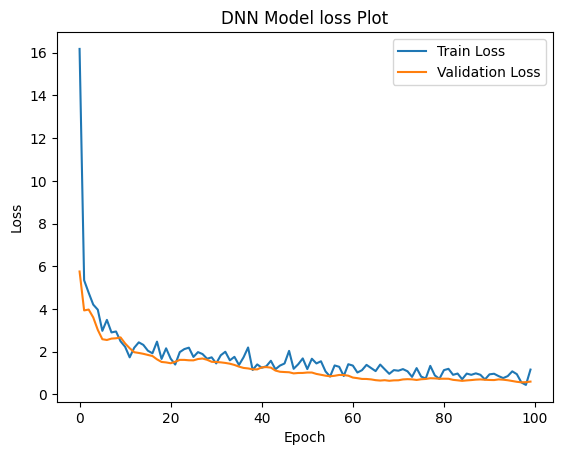

In [804]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DNN Model loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [805]:
test_loss, test_mse=hypermodel.evaluate(X_test,y_test)

1/1 [==============================] - 0s 12ms/step - loss: 31.9173 - mse: 31.9173


In [806]:
y_pred=dnn_model.predict(X_test)
y_pred

array([[4.555614 , 1.7452874],
       [4.4129972, 8.320691 ],
       [0.9781878, 4.3231726],
       [2.125399 , 6.517643 ],
       [4.5042305, 2.355205 ],
       [4.0020585, 6.805636 ],
       [1.3532099, 6.235472 ],
       [4.06911  , 6.9035616],
       [3.5546606, 4.3863754],
       [2.840784 , 7.608809 ],
       [2.737937 , 2.262535 ],
       [1.156049 , 2.3760982]], dtype=float32)

In [807]:
y_test=pd.DataFrame(y_test,columns=['x','y'])
y_pred=pd.DataFrame(y_pred, columns=['predicted_x','predicted_y'])

In [808]:
df_final = pd.DataFrame()
df_final = pd.concat([y_pred, y_test], axis=1)
df_final

,predicted_x,predicted_y,x,y
0,4.555614,1.745287,6,1
1,4.412997,8.320691,6,7
2,0.978188,4.323173,1,5
3,2.125399,6.517643,2,6
4,4.504230,2.355205,5,3
5,4.002059,6.805636,4,7
6,1.353210,6.235472,1,7
7,4.069110,6.903562,4,8
8,3.554661,4.386375,4,5
9,2.840784,7.608809,2,8


In [809]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))

rmse=sqrt(mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))


Mean Squared Error (MSE) on new data in m: 0.60
Root Mean Squared Error (RMSE) on new data in m: 0.78


In [810]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3,5,7,9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(y_pred, y_test)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(y_pred)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))
rmse=sqrt(mean_squared_error(y_test, knn_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))
from sklearn.metrics import mean_absolute_percentage_error
#print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(y_test,knn_pred)))


Best K value found by grid search: 3
Mean Squared Error (MSE) on new data in m: 0.71
Root Mean Squared Error (RMSE) on new data in m: 0.84


In [794]:
# x_train, x_val, and x_test shape check.
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(26, 156)
(12, 156)
(6, 156)


In [693]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch


In [694]:
def create_model(hp):
    model = keras.Sequential()
    model.add(layers.LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32), 
                          input_shape=(timesteps, n_features)))
    model.add(layers.Dense(units=2, activation='linear'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='mean_squared_error',
                  metrics=['mse'])
    return model


In [727]:
# reshape input data to have an additional dimension for the number of features
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

timesteps = X_train.shape[1]
n_features = X_train.shape[2]


def build_model(hp):
    model = keras.Sequential()
    model.add(layers.LSTM(units=hp.Int('units_1', min_value=32, max_value=1024, step=16),input_shape=(timesteps, n_features)))
    model.add(keras.layers.Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    
    for i in range(hp.Int('num_hidden_layers', 1, 2)):
        model.add(layers.LSTM(units=hp.Int('units_' + str(i+2), min_value=32, max_value=1024, step=16),
                                 activation=hp.Choice('activation_' + str(i+2), values=['relu', 'sigmoid', 'tanh'])))
        model.add(layers.Dropout(hp.Float('dropout_' + str(i+2), min_value=0.0, max_value=0.5, step=0.1)))
    
        
    model.add(keras.layers.Dense(units=2, activation='linear'))
    
    
    model.compile(optimizer=keras.optimizers.Adam(
                        hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),

                  loss='mean_squared_error',
                  metrics=['mse'])
    return model


In [728]:
tuner_search = RandomSearch(create_model,
                            objective='val_mse',
                            max_trials=20,
                            executions_per_trial=6,
                            directory='my_ddggsnirdrn',
                            project_name='my_pnsrsarogject')

INFO:tensorflow:Reloading Tuner from my_ddggsnirdrn\my_pnsrsarogject\tuner0.json


In [729]:
# Search for the best hyperparameters
tuner_search.search(X_train, y_train,
             epochs=100,
           validation_data=(X_val,y_val) ,
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])


INFO:tensorflow:Oracle triggered exit


In [730]:
best_hps=tuner_search.get_best_hyperparameters(num_trials=1)[0]
lstm_model = tuner_search.hypermodel.build(best_hps)

from keras.callbacks import EarlyStopping



n_epochs=100
#history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=32, validation_split=0.2,callbacks=callbacks_list)
#history = model.fit(X_train, y_train, epochs=n_epochs, bbatch_size=32, validation_split=0.2,callbacks=callbacks_list)
history = lstm_model.fit(X_train, y_train, epochs=n_epochs, batch_size=32, validation_data=(X_val,y_val),callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 17.0252 - mse: 17.0252 - val_loss: 14.9814 - val_mse: 14.9814
Epoch 2/100
1/1 [==============================] - 0s 215ms/step - loss: 14.3241 - mse: 14.3241 - val_loss: 35.0292 - val_mse: 35.0292
Epoch 3/100
1/1 [==============================] - 0s 43ms/step - loss: 31.8231 - mse: 31.8231 - val_loss: 6.7210 - val_mse: 6.7210
Epoch 4/100
1/1 [==============================] - 0s 45ms/step - loss: 4.3479 - mse: 4.3479 - val_loss: 8.4594 - val_mse: 8.4594
Epoch 5/100
1/1 [==============================] - 0s 43ms/step - loss: 6.9095 - mse: 6.9095 - val_loss: 7.9867 - val_mse: 7.9867
Epoch 6/100
1/1 [==============================] - 0s 42ms/step - loss: 6.3815 - mse: 6.3815 - val_loss: 6.9310 - val_mse: 6.9310
Epoch 7/100
1/1 [==============================] - 0s 38ms/step - loss: 5.1737 - mse: 5.1737 - val_loss: 6.1251 - val_mse: 6.1251
Epoch 8/100
1/1 [==============================] - 0s 39ms/step - loss: 4.2099 - 

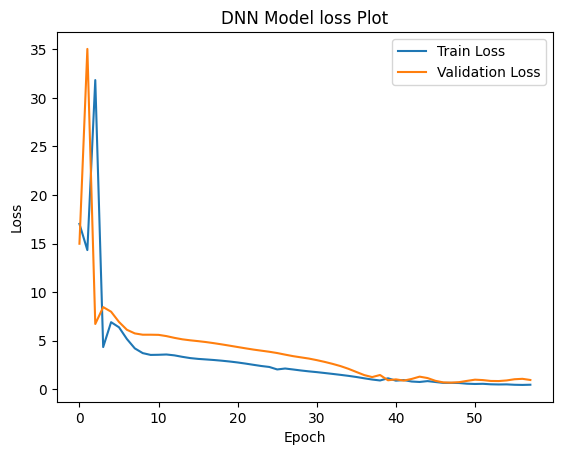

In [731]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DNN Model loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [732]:
# evaluate the model on the test data
test_loss, test_mse= lstm_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 98ms/step - loss: 2.5891 - mse: 2.5891
